<a href="https://colab.research.google.com/github/norm02/python-stations/blob/main/Station7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Version | Published Date| Details | 
| -- | -- | -- |
| ver.1.0.0 | 2023/3/29 | 初版リリース |

# 可視化の基礎を学ぼう

前回のStationでは，Pandasを使った集計や統計量について学びました。集計や統計量はデータ分析のためには非常に重要な概念です。しかしそういった数値はどうしても情報が圧縮されてしまい，データ本来の特徴をとらえているとはいえない場合もあります。

そんな場合のために，このStationでは可視化について学びます。可視化とは主にグラフによってデータを見やすくする手法のことです。可視化は大量のデータを扱うときには必ず使う重要な概念です。手を動かしながらしっかり学んでいきましょう。

# Matplotlib

**[Matplotlib](https://matplotlib.org/)** はPythonで古くから使われているグラフを描画するためのライブラリです。表示したいものの `x` 座標と `y` 座標にあたるものをそれぞれ定義し `plt.plot()` メソッドで折れ線グラフを表示できます。

In [1]:
from matplotlib import pyplot as plt
from random import randint

# データの定義
x = range(1, 7)                       # 表示する値のx座標
y1 = pd.Series([11, 9, 12, 8, 13, 7]) # 表示する値のy座標1
y2 = pd.Series([1, 2, 3, 51, 2, 1])   # 表示する値のy座標2

# グラフの描画
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


NameError: ignored

散布図以外にも `plt.bar()` メソッドで棒グラフ， `plt.scatter()` メソッドで線グラフを表示できます。


In [ ]:
plt.bar(x, y1)
plt.scatter(x, y2)
plt.show()

前回学んだ `mean()` メソッドを使って `y1` と `y2` の平均をそれぞれ算出します。

In [ ]:
y1_mean = y1.mean()
y2_mean = y2.mean()
print(y1_mean, y2_mean)

`y1` と `y2` それぞれを散布図としてプロットし，平均値も重ねます。`axhline()` メソッドは引数に渡した値となるx軸と平行な線をプロットするメソッドです。

`y1` と `y2` は平均値が同じですが，実際は `y2` のうちひとつのデータが飛び抜けていることがわかります。

In [ ]:
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.axhline(y1_mean, color='blue')
plt.axhline(y2_mean, color='orange')
plt.show()

前回のStationでも説明しましたが，平均値が同じでも実際に可視化して **分布 (Distribution)** を見ると異なった特徴をしている場合が多くあります。単に統計量を見るだけでデータの特徴を捉えようとせず，可視化をして **分布そのものをとらえる** 癖をつけましょう。

# Irisデータセットの読み込み

今回もIrisデータセットを読み込みます。

In [3]:
import pandas as pd

# Irisデータセットを読み込む
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Seaborn

Matplotlib は可視化のための強力なツールのひとつですが，より簡単に可視化できるツールとして [Seaborn](https://seaborn.pydata.org/) があります。Seabornの細かい説明はしませんが，可視化のための代表的な概念をいくつか紹介します。

## 分布の可視化

In [4]:
import seaborn as sns

### ヒストグラム

`displot()` メソッドは分布を可視化するために役立ちます。 `data` 引数に `iris` を渡して `x` に `sepal_length` を指定します。非常に簡単に `sepal_length` を可視化することができました。

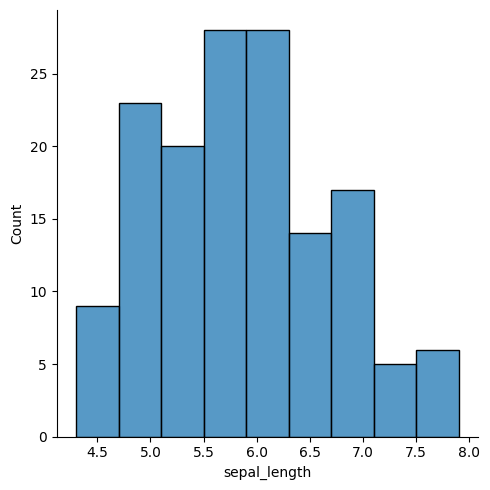

In [5]:
sns.displot(data=iris, x="sepal_length", kind='hist')

`distplot()` メソッドの引数 `kind='hist'` を指定すると，**ヒストグラム (Histgram)** を可視化できます。ヒストグラムとは対象のデータを区間ごとに区切り，その数を縦軸，区間を横軸として可視化したものです。

同じように `sepal_width` についても可視化してみます。 `sepal_length` とは違う分布になっていることがわかります。

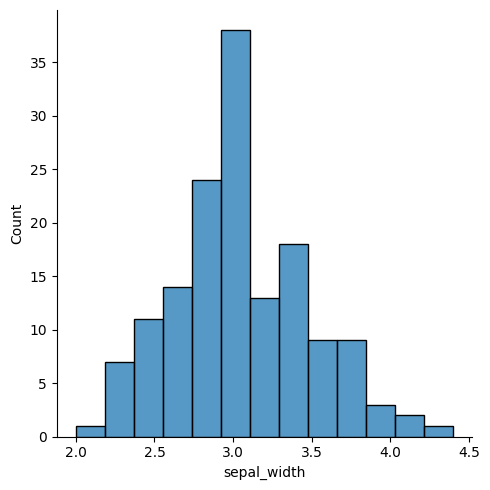

In [6]:
sns.displot(data=iris, x="sepal_width", kind='hist')

### カーネル密度推定

**カーネル密度推定 (KDE; Kernel Density Estimation)** は，ヒストグラムと同様に元の分布を可視化したものです。ここではカーネル密度推定の詳しい説明は省きますが，これもヒストグラムと同様に可視化のための非常に強力な手法です。

`displot()` メソッドの引数 `kind='kde'` とすることで呼び出すことができます。

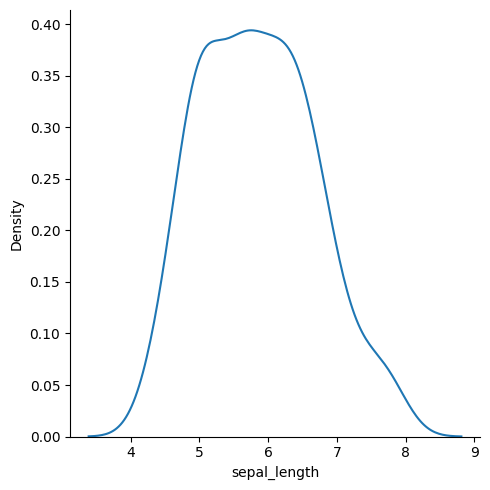

In [7]:
sns.displot(data=iris, x="sepal_length", kind='kde')

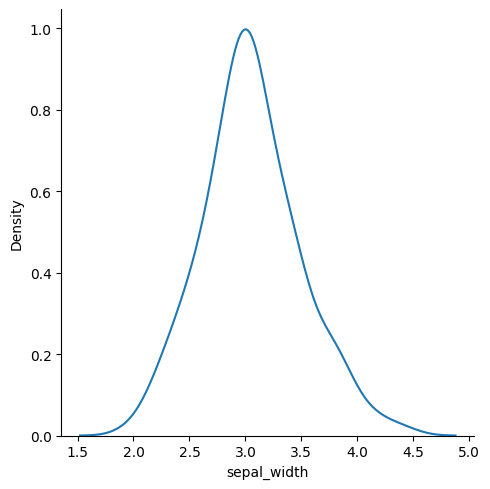

In [8]:
sns.displot(data=iris, x="sepal_width", kind='kde')

### 集計

しかし，主にデータの個数が小さいや値がとびとびの場合にヒストグラムやカーネル密度推定を使用してしまうと値が丸められて見づらくなってしまうことがあります。

そういったときは `countplot()` メソッドを用います。これはヒストグラムやカーネル密度推定と違い単純にそれぞれの値ごとの個数を数えています。

<Axes: xlabel='petal_width', ylabel='count'>

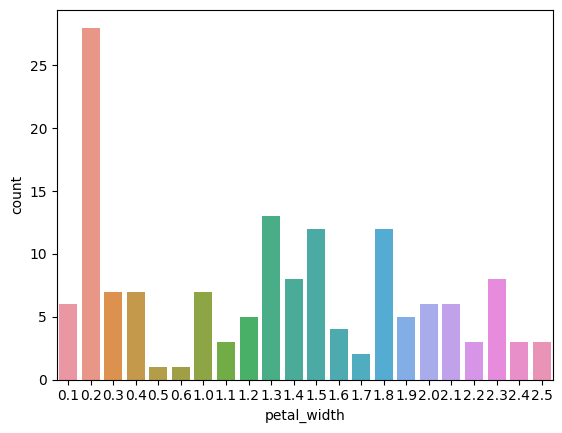

In [9]:
sns.countplot(iris, x='petal_width')

### 箱ひげ図

**箱ひげ図 (Boxplot)** もデータの特徴をとらえるのに非常に便利です。Station6で学んだ統計量を図示でき，直感的にデータの概観をとらえることができます。 `boxplot()` メソッドの引数 `showmeans=True` を渡し，平均値も表示しています。

<img src="https://drive.google.com/uc?id=1yGLBXqybLfmsq2fn4yX5li0AYhFDFo5V" width="400px">

<Axes: >

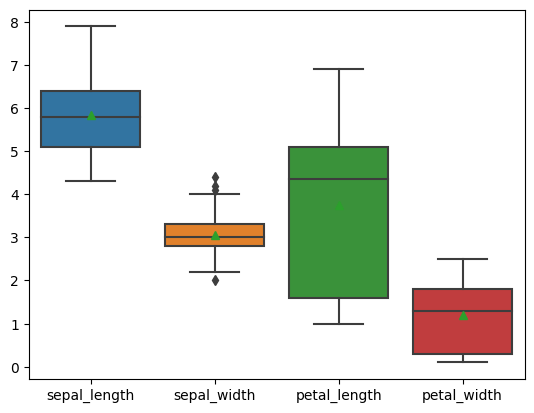

In [10]:
sns.boxplot(iris, showmeans=True)

### バイオリン図

しかし箱ひげ図も統計量を使って情報を圧縮しており，分布の真の形をとらえることができない場合があります。具体的には分布の山が2つある場合です。そういった問題を回避するために，バイオリン図もよく用いられます。

これは箱ひげ図の代わりにカーネル密度推定による分布推定をプロットした図です。箱ひげ図を見るだけではわからなかった分布の形がわかります。

<Axes: >

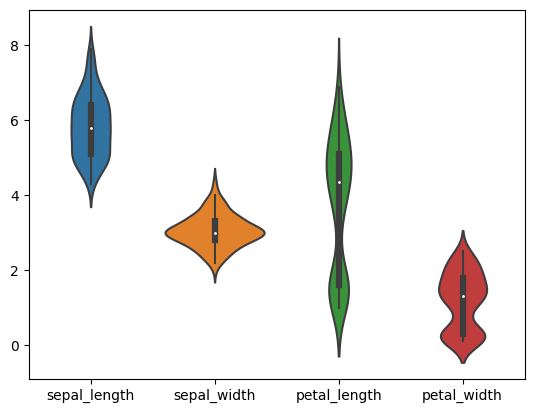

In [11]:
sns.violinplot(iris, showmeans=True)

## カテゴリーの可視化

これまでは `sepal_length` や `sepal_width` といった値を単一で扱ってきました。しかし実際のデータ分析では，それぞれのデータをカテゴリーごとに扱うことがあります。たとえば Iris データセットでは `species` がカテゴリーにあたります。

ここではPythonの組み込み型である [`set`](https://docs.python.org/ja/3/library/stdtypes.html#set-types-set-frozenset) を使っています。 `set` は集合型と呼ばれ，重複を許さず順序もありません。そのため `pd.Series` や `list` を渡すと重複を取り除きカテゴリーとして表示させることができます。

In [12]:
set(iris["species"])

{'setosa', 'versicolor', 'virginica'}

### ヒストグラムの色分け

それでは今まで表示していたヒストグラムをカテゴリーごとに表示してみましょう。 `distplot` メソッドの引数 `hue='species'` とすることで，カテゴリーごとに色分けして可視化できます。

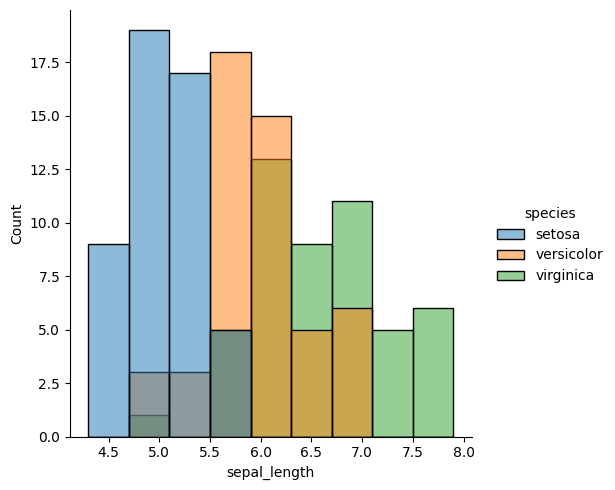

In [13]:
sns.displot(data=iris, x="sepal_length", kind='hist', hue='species')

少し分布が重なってしまって見づらいですね。このようなときは引数 `col='species'` とするとそれぞれのカテゴリーごとに別のグラフを一度に描画できます。

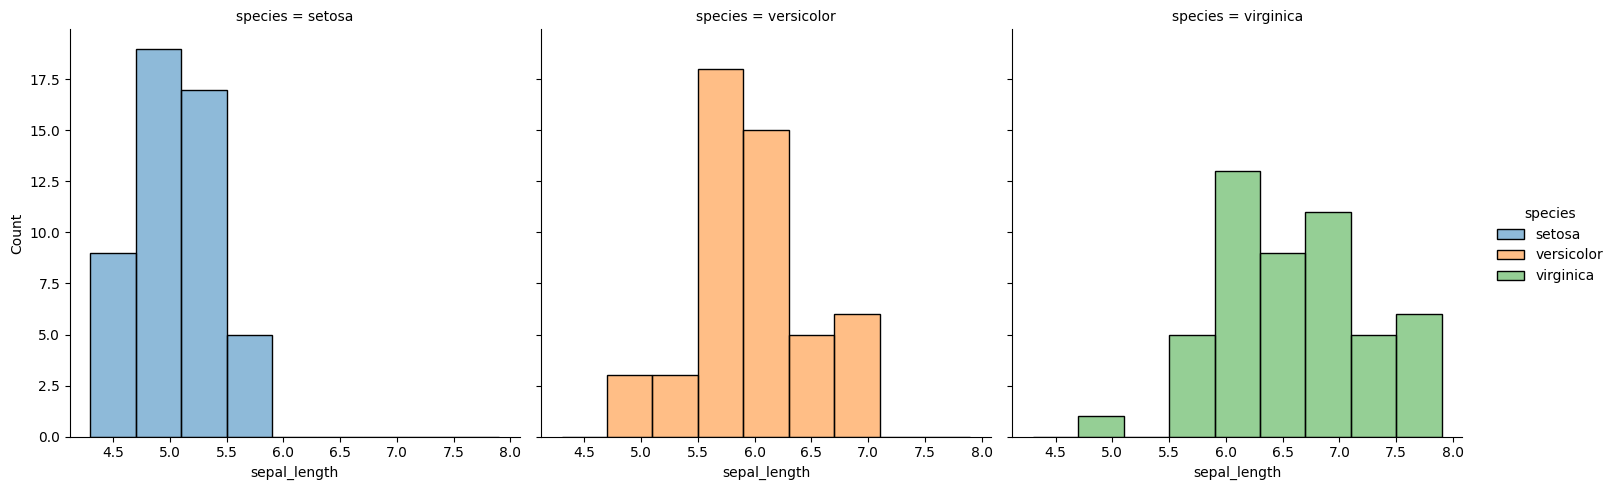

In [14]:
sns.displot(data=iris, x="sepal_length", kind='hist', hue='species', col='species')

カーネル密度推定を使うとよりカテゴリーごとの分布がわかりやすくなります。

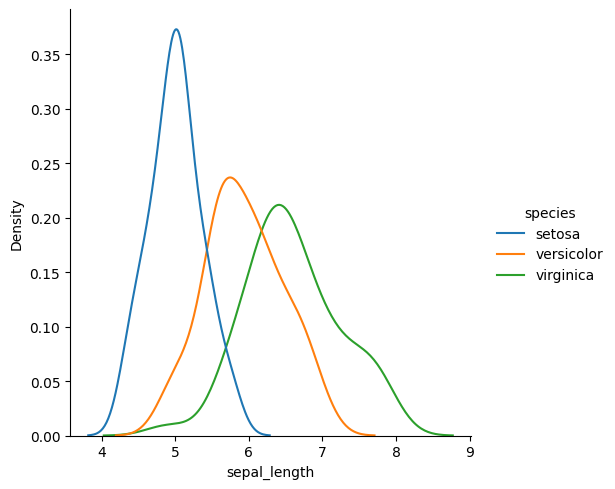

In [15]:
sns.displot(data=iris, x="sepal_length", kind='kde', hue='species')

### 箱ひげ図・バイオリン図の色分け

同様に，箱ひげ図やバイオリン図を使っても分布ごとの特徴を可視化できます。

<Axes: xlabel='sepal_width', ylabel='species'>

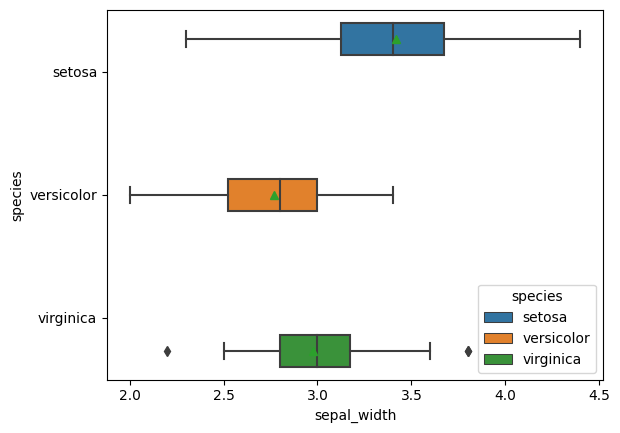

In [16]:
sns.boxplot(iris, x='sepal_width', y='species', hue='species', showmeans=True)

<Axes: xlabel='sepal_width', ylabel='species'>

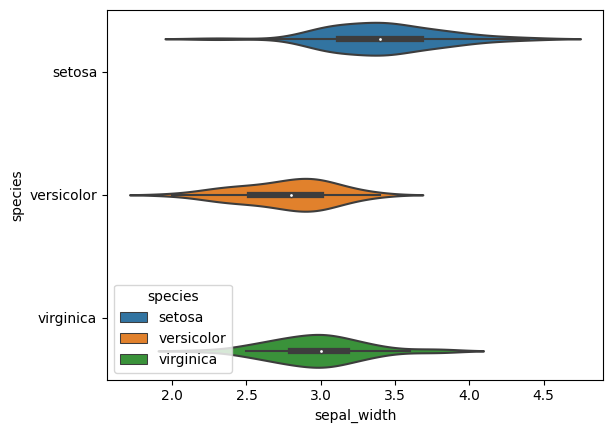

In [17]:
sns.violinplot(iris, x='sepal_width', y='species', hue='species', showmeans=True)

## 相関関係の可視化

今までは主にひとつの特徴量についての可視化をしてきました。しかし実際には特徴量ひとつだけの可視化や分析をすることは少なく，多くの場合で特徴量同士の相関関係を見たい場合があります。

### 散布図

そういった場合に **散布図 (Scatterplot)** を使うと非常に便利です。

<Axes: xlabel='petal_length', ylabel='petal_width'>

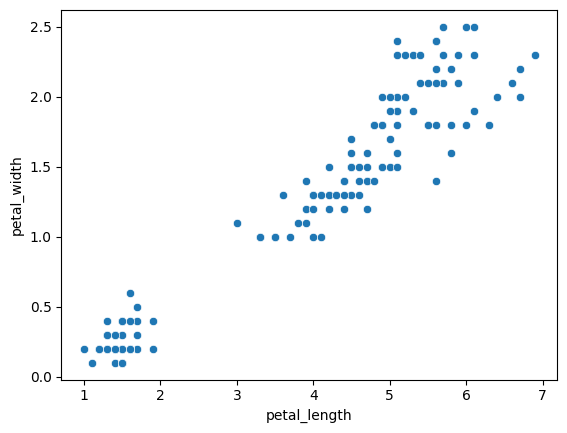

In [18]:
sns.scatterplot(iris, x='petal_length', y='petal_width')

これも今までと同様に引数 `hue='species'` とすることで，カテゴリーごとに色を変えてプロットできます。

これで `species` ごとに `petal_length` と `petal_width` との間になにかしらの相関関係があることがわかります。

<Axes: xlabel='petal_length', ylabel='petal_width'>

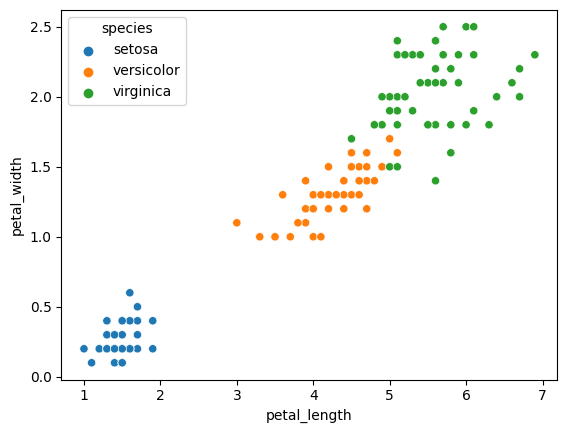

In [19]:
sns.scatterplot(iris, x='petal_length', y='petal_width', hue='species')

このように相関関係を見ながらカーネル密度推定を行うこともできます。

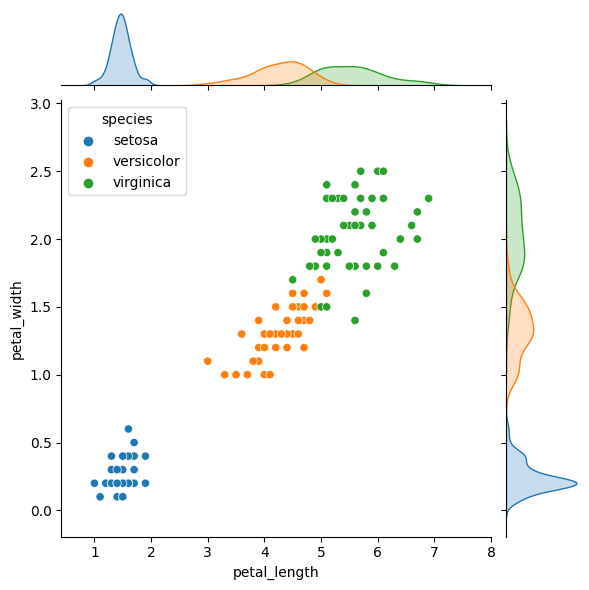

In [20]:
sns.jointplot(iris, x='petal_length', y='petal_width', hue='species')

相関関係をヒストグラムとして図示したり

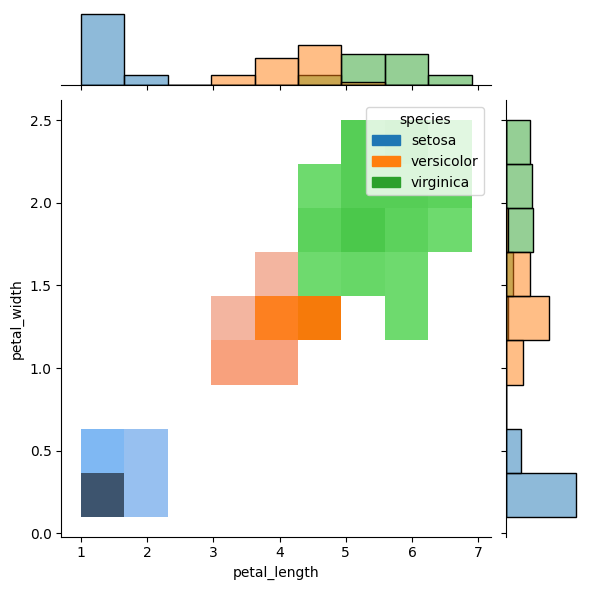

In [21]:
sns.jointplot(iris, x='petal_length', y='petal_width', hue='species', kind='hist')

2次元のカーネル密度推定を使った等高線として図示することもできます。

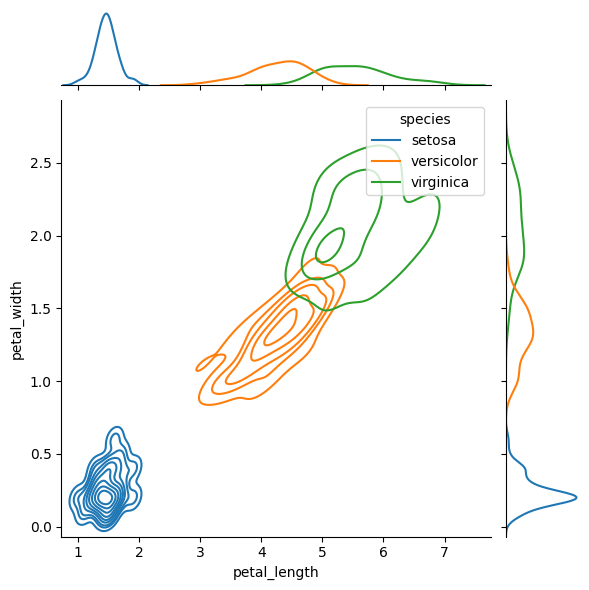

In [22]:
sns.jointplot(iris, x='petal_length', y='petal_width', hue='species', kind='kde')

## Pairplot

しかし相関関係を図示するには，2つの特徴量のペアを分析者自身が設定する必要がありました。しかしSeabornには強力な `pairplot` メソッドがあります。これはすべての特徴量のペアを一度に可視化するメソッドで，とにかくどこから分析したらいいかわからないデータの概観をつかむのによく利用します。

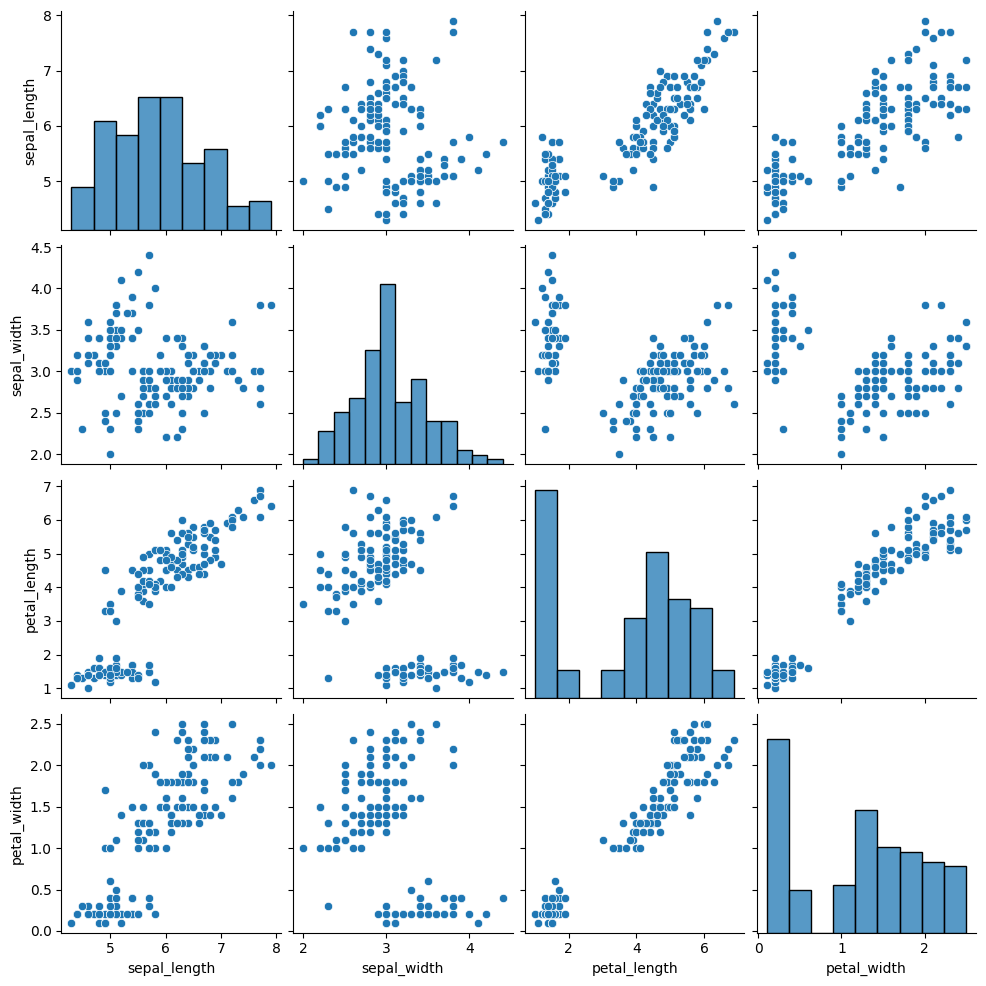

In [23]:
sns.pairplot(iris)

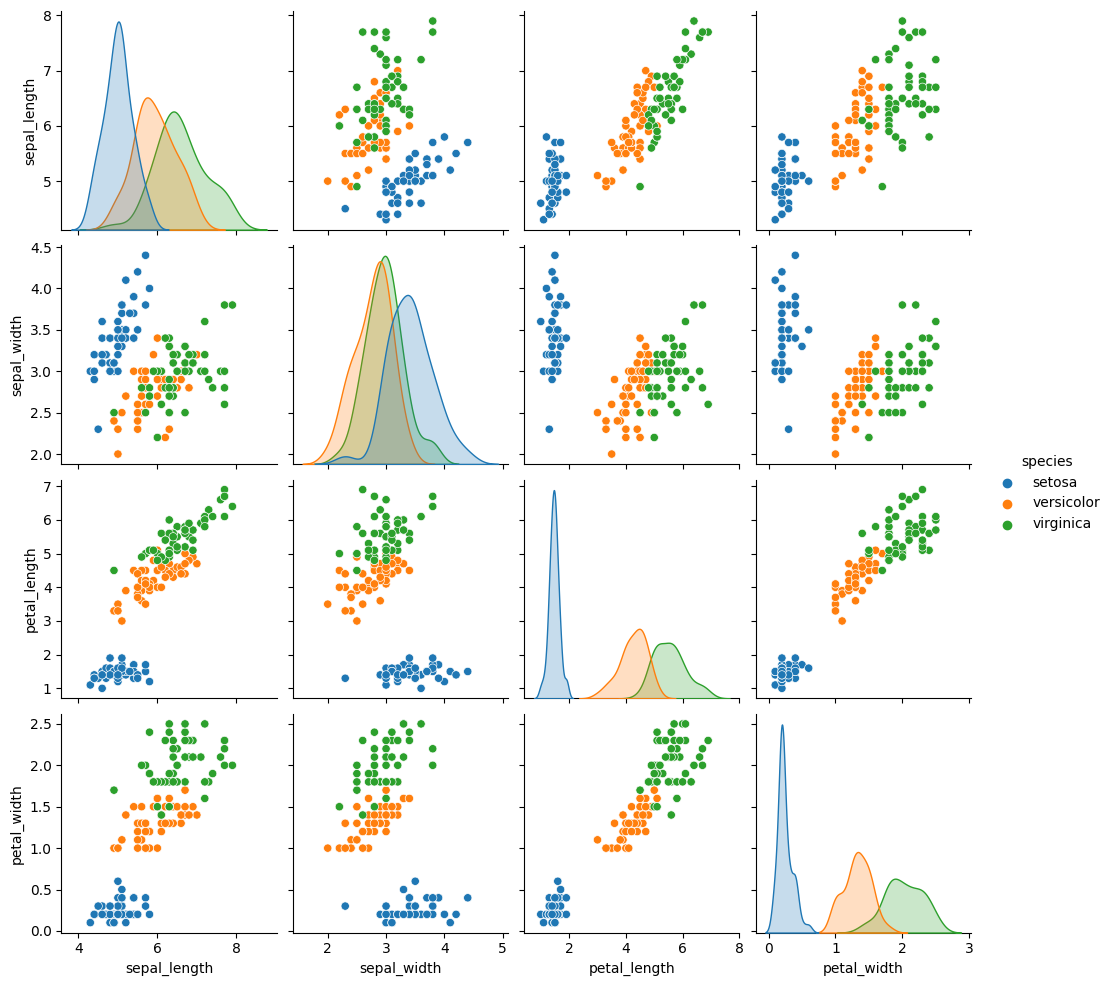

In [24]:
sns.pairplot(iris, hue='species')

# 確認テスト

今まで触ってきた Titanic データセットを使って可視化をしてみましょう。Seabornについて調べながら自分の手で可視化をしてみましょう。

- 少なくともひとつ以上の可視化をする
- 可視化をしてデータから読み取れたことを説明する

以上のことを意識して面談をしてみましょう。

In [25]:
import pandas as pd

titanic_dataset = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [27]:
print(titanic_dataset.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

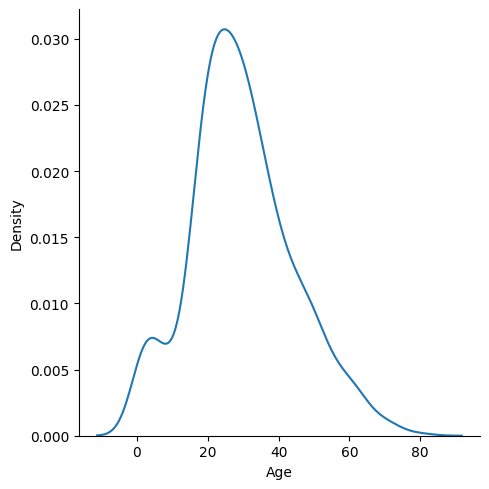

In [30]:
sns.displot(data=titanic_dataset, x="Age", kind='kde')

実際の年齢のヒストグラムは、２０代が多い。豪華客船だからもっと年齢高めがピークだと思っていた

In [35]:
titanic_dataset["round_Fare"] = round(titanic_dataset["Fare"])

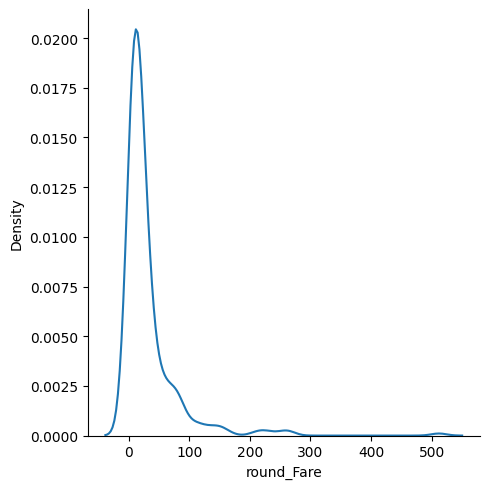

In [49]:
sns.displot(data=titanic_dataset, x="round_Fare", kind='kde')

運賃といってもこんなに差がある

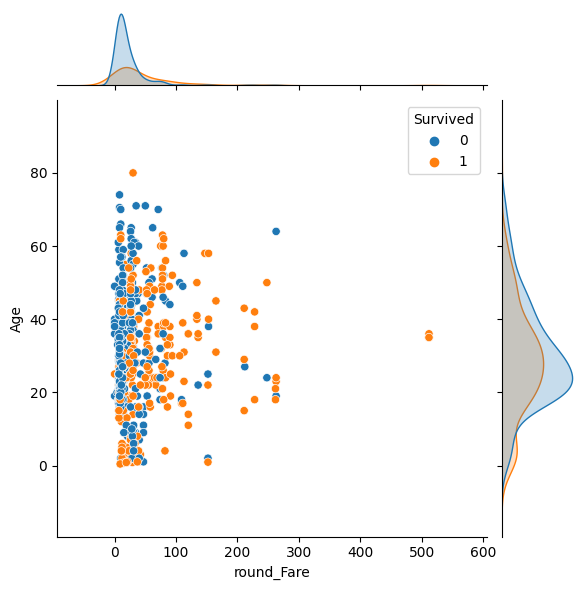

In [39]:
sns.jointplot(titanic_dataset, x='round_Fare', y='Age', hue='Survived')

運賃（整数に丸め）が横軸、年齢が縦軸の散布図で、生き残ったかどうかを可視化。運賃が高いほうが生き残りやすいみたい。裕福なほうが栄養が行き届いていたとか？

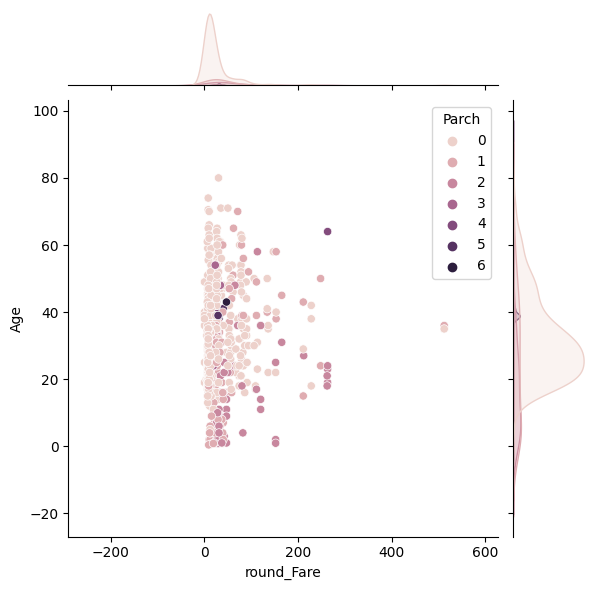

In [40]:
sns.jointplot(titanic_dataset, x='round_Fare', y='Age', hue='Parch')

今度はhueを親子供が同乗しているかどうかで可視化。

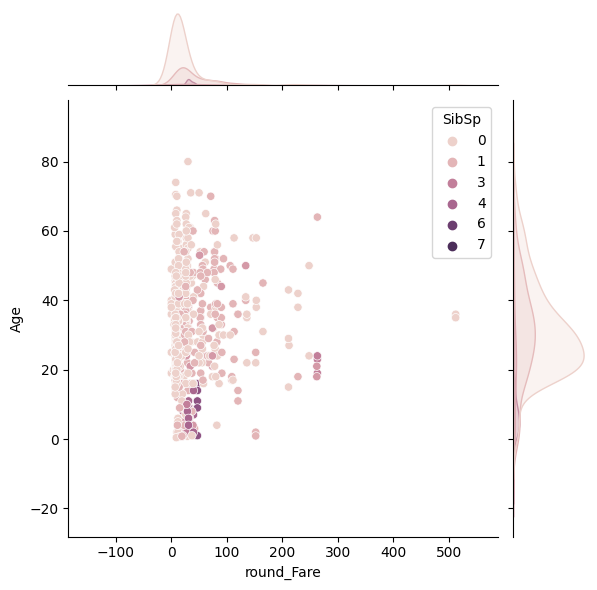

In [48]:
sns.jointplot(titanic_dataset, x='round_Fare', y='Age', hue='SibSp')

兄弟が多い人は年齢が若い（成人してない）

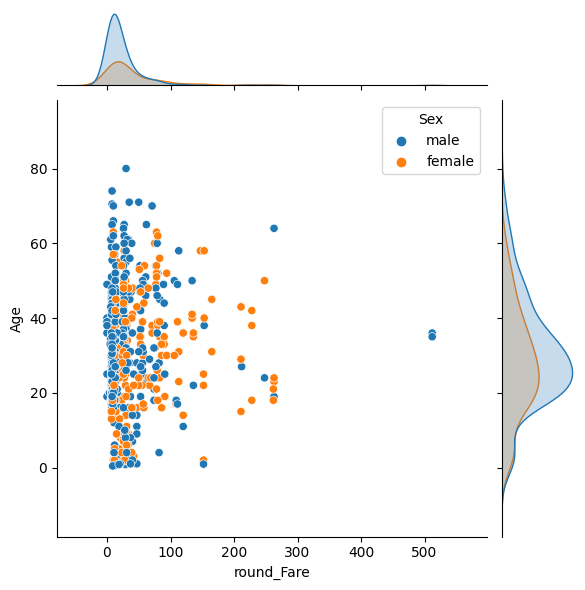

In [41]:
sns.jointplot(titanic_dataset, x='round_Fare', y='Age', hue='Sex')

女性のほうが高い運賃の乗客である傾向にある

In [42]:
titanic_corr = titanic_dataset.corr()

In [43]:
print(titanic_corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
round_Fare      0.012646  0.257088 -0.549638  0.096219  0.159912  0.215967   

                 Fare  round_Fare  
PassengerId  0.012658    0.012646  
Survived     0.257307    0.257088  
Pclass      -0.549500   -0.549638  
Age          0.096067    0.096219  
SibSp        0.159651    0.159912  
Parch        0.216225    0.215967  
Fare         1.000000    0.999984  
round_Far

<Axes: >

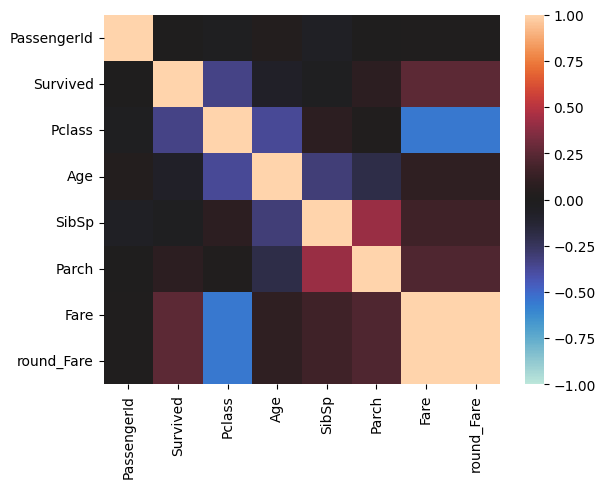

In [45]:
sns.heatmap(titanic_corr, vmax=1, vmin=-1, center=0)

目立って相関が高いのは

*   生存状況と運賃
*   生存状況と旅客クラス
*   旅客クラスと運賃
*   旅客クラスと年齢
*   年齢と兄弟や配偶者の数
*   兄弟や配偶者の数と親や子供の数

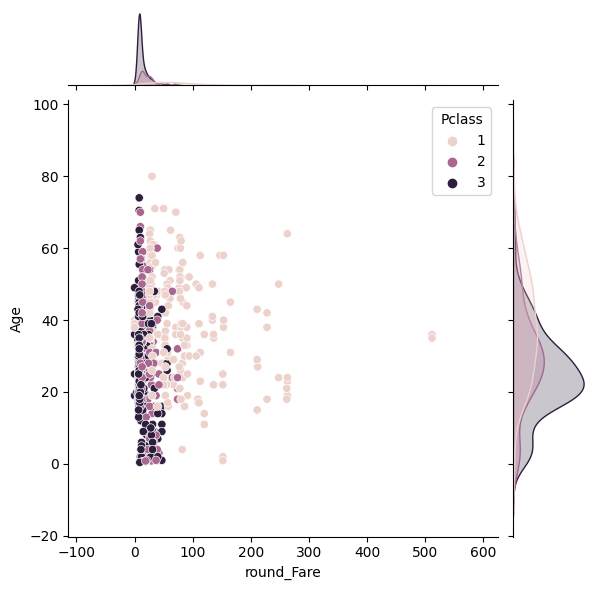

In [46]:
sns.jointplot(titanic_dataset, x='round_Fare', y='Age', hue='Pclass')

当然旅客クラスが低いと運賃は安い。
未成年はほぼほぼ一番安いクラス

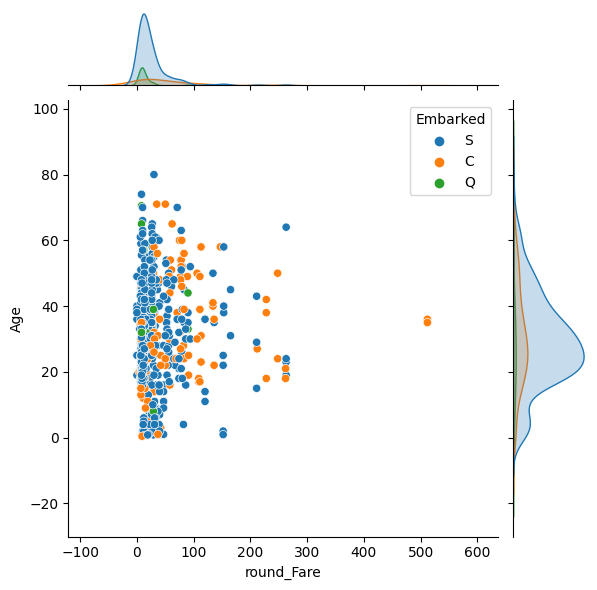

In [47]:
sns.jointplot(titanic_dataset, x='round_Fare', y='Age', hue='Embarked')

出港場所による違いなんてと思ったけれど、意外と差がちゃんとあった。